ÈÄô‰ªΩ code Âú®ÂÅöÂïÜÂìÅÁöÑÂâçËôïÁêÜ

0. ÁúãÂïÜÂìÅË≥áÊñôÔºöinput `SalePage.csv`
1. BERT Âèñ CLS vecÔºöoutput `SalePage_bertvecs.csv`
2. MONPA Êñ∑Ë©ûÔºöoutput `SalePage_cutterms.csv`
3. Êñ∑Ë©ûÂæåÂ∞èÁµ±Ë®à„ÄÅÂÅöÂ≠óÂÖ∏Ôºöoutput `SalePage_vocab.csv`

In [169]:
import pandas as pd 
import numpy as np
from tqdm import tqdm
tqdm.pandas()  # init ÈÄ≤Â∫¶Ê¢ù
import gc  # Ë®òÊÜ∂È´îÁöÑÂûÉÂúæÂõûÊî∂, Áî®Ê≥ï: gc.collect()
from collections import Counter  # Êñ∑Ë©ûÂ∞èÁµ±Ë®à
import re # Ê≠£Ë¶èË°®ÈÅîÂºè
import unicodedata  # unicode ËôïÁêÜ e.g. ÊäìÊ®ôÈªûÁ¨¶Ëôü
import matplotlib.pyplot as plt  # Áï´ÂúñÁî®
from matplotlib_venn import venn2  # ÊñáÊ∞èÂúñ
plt.rcParams['font.family']=['Noto Sans TC'] # ‰∏≠ÊñáÈ°ØÁ§∫

In [11]:
DATA_DIR = 'data'
!ls {DATA_DIR}

SalePage.csv          SalePage_cutterms.csv Three_NAPLNEW(A).csv


### 0. Áúã‰∏Ä‰∏ãÂïÜÂìÅË≥áÊñô
- ÂïÜÂìÅË≥áÊñô `SalePage.csv`
- ÁúãÂïÜÂìÅÊ®ôÈ°å `SalePageTitle`„ÄÅÂïÜÂìÅÊïòËø∞ `SaleProductDescShortContent` ÁöÑÂ≠óÊï∏ÂàÜÂ∏É

ShopId  SalePageId  \
0      NOmceSRCGAE2GjCOCwaCrA==     7104874   
1      NOmceSRCGAE2GjCOCwaCrA==     7098357   
2      NOmceSRCGAE2GjCOCwaCrA==     7098402   
3      NOmceSRCGAE2GjCOCwaCrA==     7048775   
4      NOmceSRCGAE2GjCOCwaCrA==     7076969   
...                         ...         ...   
46240  NOmceSRCGAE2GjCOCwaCrA==     9229146   
46241  NOmceSRCGAE2GjCOCwaCrA==     9545749   
46242  NOmceSRCGAE2GjCOCwaCrA==     9370014   
46243  NOmceSRCGAE2GjCOCwaCrA==     9288119   
46244  NOmceSRCGAE2GjCOCwaCrA==     9376440   

                                           SalePageTitle  \
0                                 Êà∞Á•ûMARSÊêñÊêñÊùØ2.0-600ml-Â§úÂπïÈªë   
1                                     ÂúãÂ§™Ê®ì‰ºØÁàµÁ¥ÖËå∂ 28.8g-ËòãÊûúÈ¢®Âë≥   
2                                        ÊõºÂØßÂÅ•Â∫∑Ëä±ËçâËå∂15ÂÖ•-Â§öÊ¨æ‰ªªÈÅ∏   
3                                   ÈòøËèØÁî∞ÁáüÈ§äÂ∑ßÂÖãÂäõÈ∫•ËäΩÈ£≤ÂìÅ 20g*13ÂÖ•   
4                                           ÊõºÂØßÊúâÊ©üËòãÈ¶ôËàíÁ∑©Ëå∂20ÂÖ•   
...                                                  ...   
46240                                Ë¥à-BioreÊ∑®Â´©Ê≤êÊµ¥‰π≥300gÊ´ªËä±È¶ô   
46241                       2/28-3/05Ë¥àÂìÅ-Ê∞ßÈ°èÊ£ÆÊ¥ªÂæÆÂàÜÂ≠ê‰π≥Êú®Êûú‰øùÊøïÈù¢ËÜú3ÂÖ•   
46242  12/06-01/09ÈñÄÂ∏ÇÂèñË≤®Êªø$590ÊäΩApple Watch S9 LTE 41mm (...   
46243                „ÄêÂª†ÂïÜÁõ¥ÈÄÅ„ÄëË¥à-ILOVEPINKÊä±Êûï-2ÂÖ•(È°èËâ≤Èö®Ê©üÂá∫Ë≤®)-$799   
46244                                  Ë¥àÂìÅ-ÈúìÂáàÊÄùÈáëÁõûËä±‰øùÊøïËàíÁ∑©Èù¢ËÜú4Áâá   

                             SaleProductDescShortContent  
0                                                    NaN  
1                                                 Êó•Êú¨ÂéüË£ùÈÄ≤Âè£  
2               ÂÑ™ÈõÖÊ∏ÖÈ¶ôÁöÑÁé´Áë∞Ëä±Ëå∂\nÈ§äÈ°èÁæéÂÆπ Êï£ÁôºÂá∫Ëø∑‰∫∫È¶ôÊ∞£\nÈÄ≤Âè£Âæ∑ÂúãËä±ËçâÂéüÊñôÔºåÂìÅË≥™ÂÆâÂøÉÂèØÈù†  
3      Ê∫êËá™ÁëûÂ£´ÁôæÂπ¥È∫•ËäΩÁ∂ìÂÖ∏\nÂö¥ÈÅ∏ÂÑ™Ë≥™È∫•ËäΩÁ≤æËèØ„ÄÅÊøÉÈÉÅÂèØÂèØÂèäÊøÉÈÜá‰π≥È¶ô\nÂÖºÈ°ßÂÅ•Â∫∑ËàáÁæéÂë≥ÔºåÂÆåÁæéË™øÈÖçÁáüÈ§ä...  
4          ‚Ä¢ÊôöÈ§êÂæåÊàñÁù°ÂâçÊúÄÂ•ΩÁöÑËàíÁú†È£≤ÂìÅ\n‚Ä¢Â∏∂ÊúâËòãÊûúÁîúËúúÈ¶ôÊ∞£ÁöÑÊ¥ãÁîòËèä\n‚Ä¢ÂéüÊñô‰æÜËá™Âæ∑ÂúãÔºåÂìÅË≥™‰ª§‰∫∫‰ø°Ë≥¥  
...                                                  ...  
46240                                Ë¥à-BioreÊ∑®Â´©Ê≤êÊµ¥‰π≥300gÊ´ªËä±È¶ô  
46241                       2/28-3/05Ë¥àÂìÅ-Ê∞ßÈ°èÊ£ÆÊ¥ªÂæÆÂàÜÂ≠ê‰π≥Êú®Êûú‰øùÊøïÈù¢ËÜú3ÂÖ•  
46242  12/06-01/09ÈñÄÂ∏ÇÂèñË≤®Êªø$590ÊäΩApple Watch S9 LTE 41mm (...  
46243                „ÄêÂª†ÂïÜÁõ¥ÈÄÅ„ÄëË¥à-ILOVEPINKÊä±Êûï-2ÂÖ•(È°èËâ≤Èö®Ê©üÂá∫Ë≤®)-$799  
46244                                  Ë¥àÂìÅ-ÈúìÂáàÊÄùÈáëÁõûËä±‰øùÊøïËàíÁ∑©Èù¢ËÜú4Áâá  

[46245 rows x 4 columns]

is title nan? 0
title_length range 1 81


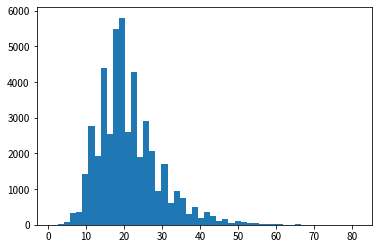

is description nan? 2938
desc_length range 1.0 550.0


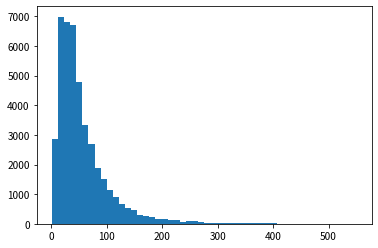

In [11]:
salePage_df = pd.read_csv(f'{DATA_DIR}/SalePage.csv')
display(salePage_df)

# SalePageTitle Â≠óÊï∏ÂàÜÂ∏É
print("is title nan?", salePage_df['SalePageTitle'].isna().sum())
salePage_df['title_length'] = salePage_df['SalePageTitle'].str.len()
print("title_length range", salePage_df['title_length'].min(), salePage_df['title_length'].max())
plt.hist(salePage_df['title_length'], bins=50)
plt.show()

# SaleProductDescShortContent Â≠óÊï∏ÂàÜÂ∏É
print("is description nan?", salePage_df['SaleProductDescShortContent'].isna().sum())
salePage_df['desc_length'] = salePage_df['SaleProductDescShortContent'].str.len()
print("desc_length range", salePage_df['desc_length'].min(), salePage_df['desc_length'].max())
plt.hist(salePage_df['desc_length'], bins=50)
plt.show()

### 1. BERT Âèñ CLS vec (Kaggle)
- input ÂïÜÂìÅË≥áÊñô `SalePage.csv`
- output ÂïÜÂìÅÊ®ôÈ°å„ÄÅÂïÜÂìÅÊïòËø∞„ÄÅÂïÜÂìÅÊ®ôÈ°å+ÊïòËø∞ÁöÑ BERT vec `SalePage_bertvecs.csv`

In [ ]:
# import, env setting
import csv
from transformers import BertTokenizer, BertModel
import torch
from tqdm import tqdm
import numpy as np
import pandas as pd

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)  # notice: GPU P100 5 min, CPU 5 hr

2025-05-23 16:17:44.883993: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748017065.066664      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748017065.118597      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


cuda


In [ ]:
# input: read docs
doc_df = pd.read_csv("/kaggle/input/bda-proj-data/SalePage.csv")  # ÂïÜÂìÅÊ®ôÈ°åËàáÊïòËø∞
#doc_df = doc_df[:100]  # small test
print("doc_df", doc_df.shape)
display(doc_df.head(1))

doc_df (46245, 4)


ShopId  SalePageId           SalePageTitle  \
0  NOmceSRCGAE2GjCOCwaCrA==     7104874  Êà∞Á•ûMARSÊêñÊêñÊùØ2.0-600ml-Â§úÂπïÈªë   

  SaleProductDescShortContent  
0                         NaN

In [ ]:
# transfer: docs texts --BERT--> CLS vecs

# load BERT tokenizer, model
tokenizer = BertTokenizer.from_pretrained('bert-base-chinese')
model = BertModel.from_pretrained('bert-base-chinese')
model.to(device)
model.eval()  # eval mode

# input texts --BERT--> output vecs
title_texts = doc_df['SalePageTitle'].fillna('').astype(str).tolist()
desc_texts = doc_df['SaleProductDescShortContent'].fillna('').astype(str).tolist()  # ËôïÁêÜ nan --> ''
all_texts = (doc_df['SalePageTitle'].fillna('') + ' ' + doc_df['SaleProductDescShortContent'].fillna('')).astype(str).tolist()

title_bertvecs = []  # 768 dim for each doc
desc_bertvecs = []
all_bertvecs = []

def get_cls_embedding(text):
    inputs = tokenizer(text, return_tensors='pt', max_length=512, truncation=True, padding='max_length')
    inputs = {key: val.to(device) for key, val in inputs.items()}
    with torch.no_grad():
        outputs = model(**inputs)
        cls = outputs.last_hidden_state[:, 0, :]  # get [CLS] vec
    return cls.squeeze().cpu().numpy()

for title, desc, alll in tqdm(zip(title_texts, desc_texts, all_texts), total=len(all_texts)):
    title_bertvecs.append(get_cls_embedding(title))
    desc_bertvecs.append(get_cls_embedding(desc))
    all_bertvecs.append(get_cls_embedding(alll))

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/110k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/269k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/624 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/412M [00:00<?, ?B/s]

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 46245/46245 [44:09<00:00, 17.46it/s]


In [ ]:
# output: save BERT CLS vecs
bert_df = pd.DataFrame({
    'SalePageId': doc_df['SalePageId'],
    'title_bertvecs': title_bertvecs,
    'desc_bertvecs': desc_bertvecs,
    'all_bertvecs': all_bertvecs,
})

bert_df.to_csv('/kaggle/working/SalePage_bertvecs.csv', index=False)
print("bert_df", bert_df.shape)
print("CLS dim", len(bert_df['title_bertvecs'][0]))
display(bert_df.head(1))

bert_df (46245, 4)
CLS dim 768


SalePageId                                     title_bertvecs  \
0     7104874  [-0.54972005, 0.16861996, -0.89927554, 0.23800...   

                                       desc_bertvecs  \
0  [0.11445117, 0.33425924, -0.33528084, 1.224486...   

                                        all_bertvecs  
0  [-0.54972005, 0.16861996, -0.89927554, 0.23800...

In [10]:
# AFTER KAGGLE, read in my env
#bert_df = pd.read_csv(f'{DATA_DIR}/SalePage_bertvecs.csv')
#print("bert_df", bert_df.shape)
#display(bert_df.head(1))
print("Ê™îÊ°àÂ§™Â§ß‰∫ÜÔºà1.73 GBÔºâÔºåÊúâÈóú BERT vec Êé•‰∏ã‰æÜË¶ÅÂÅöÁöÑÊâÄÊúâ‰∫ãÊÉÖÈÉΩÊîπÂà∞ Kaggle ‰∏äË∑ë")

Ê™îÊ°àÂ§™Â§ß‰∫ÜÔºà1.73 GBÔºâÔºåÊúâÈóú BERT vec Êé•‰∏ã‰æÜË¶ÅÂÅöÁöÑÊâÄÊúâ‰∫ãÊÉÖÈÉΩÊîπÂà∞ Kaggle ‰∏äË∑ë


### 2. MONPA Êñ∑Ë©û (Kaggle)
- input ÂïÜÂìÅË≥áÊñô `SalePage.csv`
- output ÂïÜÂìÅÊ®ôÈ°å„ÄÅÂïÜÂìÅÊïòËø∞ÁöÑÊñ∑Ë©û `SalePage_cutterms.csv`

In [ ]:
# import
#!pip install monpa
from monpa import cut, utils  # Êñ∑Ë©û
import re  # Ê≠£ÂâáË°®ÈÅîÂºè
import unicodedata  # Ê®ôÈªûÁ¨¶ËôüÂà§Êñ∑
import pandas as pd
from tqdm import tqdm

In [ ]:
# input: read docs
doc_df = pd.read_csv("/kaggle/input/bda-proj-data/SalePage.csv")  # ÂïÜÂìÅÊ®ôÈ°åËàáÊïòËø∞
#doc_df = doc_df[:100]  # small test
print("doc_df", doc_df.shape)
display(doc_df.head(1))

doc_df (46245, 4)


ShopId  SalePageId           SalePageTitle  \
0  NOmceSRCGAE2GjCOCwaCrA==     7104874  Êà∞Á•ûMARSÊêñÊêñÊùØ2.0-600ml-Â§úÂπïÈªë   

  SaleProductDescShortContent  
0                         NaN

In [ ]:
# transfer: docs texts --MONPA--> doc terms

# Ê®ôÈªû
def is_punctuation(token):
    return all(unicodedata.category(c).startswith('P') for c in token)

# Êñ∑Ë©û
def monpa_tokenize(text):
    if pd.isna(text):
        return ''
    result = []
    for sentence in utils.short_sentence(text):
        tokens = cut(sentence)  # Êñ∑Ë©û
        # ËΩâÂ∞èÂØ´, ÂéªÊéâÊï∏Â≠ó, ÂéªÊéâÊ®ôÈªû, ‰∏çÈÅéÊøæÈï∑Â∫¶ > 1 (e.g. ÊÉ≥‰øùÁïô 'Ë¥à')
        tokens = [t.strip().lower() for t in tokens if not is_punctuation(t) and not re.fullmatch(r'\d+(\.\d+)?', t)]
        result.extend(tokens)
    return ' '.join(result)

tqdm.pandas(desc="Tokenizing title")
doc_df['title_cutterms'] = doc_df['SalePageTitle'].progress_apply(monpa_tokenize)

tqdm.pandas(desc="Tokenizing desc")
doc_df['desc_cutterms'] = doc_df['SaleProductDescShortContent'].progress_apply(monpa_tokenize)

Tokenizing desc: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 46245/46245 [17:42<00:00, 43.51it/s] 


In [ ]:
# output: save MONPA cut terms
term_df = doc_df[['SalePageId', 'title_cutterms', 'desc_cutterms']]
term_df.to_csv('/kaggle/working/SalePage_cutterms.csv', index=False)
print("term_df", term_df.shape)

display(term_df.head(1))

term_df (46245, 3)
CLS dim 19


SalePageId       title_cutterms desc_cutterms
0     7104874  Êà∞Á•û mars ÊêñÊêñÊùØ ml Â§úÂπï Èªë

In [12]:
# AFTER KAGGLE, read in my env
term_df = pd.read_csv(f'{DATA_DIR}/SalePage_cutterms.csv')
print("term_df", term_df.shape)
display(term_df.head(1))

term_df (46245, 3)


SalePageId       title_cutterms desc_cutterms
0     7104874  Êà∞Á•û mars ÊêñÊêñÊùØ ml Â§úÂπï Èªë           NaN

### 3. Êñ∑Ë©ûÂæåÁöÑÂ∞èÁµ±Ë®à
- ÁúãÂïÜÂìÅÊ®ôÈ°å„ÄÅÂïÜÂìÅÊïòËø∞ÁöÑ **Êñ∑Ë©ûÊï∏Èáè**
- ÁúãÂïÜÂìÅÊ®ôÈ°å„ÄÅÂïÜÂìÅÊïòËø∞ÁöÑ **Â≠óÂÖ∏„ÄÅÂ∏∏Áî®Â≠ó**

In [14]:
# load: ÂïÜÂìÅÊñ∑Ë©û
term_df = pd.read_csv(f'{DATA_DIR}/SalePage_cutterms.csv')
print("term_df", term_df.shape)
display(term_df.head(1))

term_df (46245, 3)


SalePageId       title_cutterms desc_cutterms
0     7104874  Êà∞Á•û mars ÊêñÊêñÊùØ ml Â§úÂπï Èªë           NaN

#### 3-1. Êñ∑Ë©ûÊï∏Èáè
- Ê≤íÊúâÊ®ôÈ°åÁöÑÔºàÂéüÂßãÊ®ôÈ°åÊòØ‰∫ÇÁ¢ºÔºâÔºåÊïòËø∞ÂèØËÉΩÊúâ 'Ë¥à'
- Ê≤íÊúâÊïòËø∞ÁöÑÔºåÊ®ôÈ°åÂèØËÉΩÊúâ 'ÈôêÊôÇÁâπË≥£'
- Ê≤íÊúâÊ®ôÈ´î„ÄÅÊ≤íÊúâÊïòËø∞ÁöÑÔºåÂèØ‰ª•Âà™ÊéâÔºà‰∏çÂà™‰πü‰∏çÂΩ±ÈüøÔºâ

term_df w/ counts (46245, 5)


SalePageId       title_cutterms desc_cutterms  title_term_count  \
0     7104874  Êà∞Á•û mars ÊêñÊêñÊùØ ml Â§úÂπï Èªë           NaN                 6   

   desc_term_count  
0                0

title_term_count 
range 0 34
mean 7.901481241215267 
median 8.0


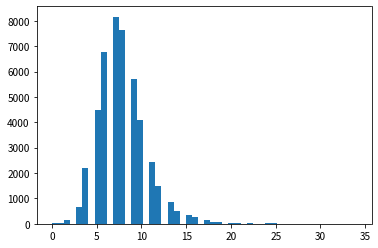

desc_term_count 
range 0 287
mean 23.80028111147151 
median 18.0


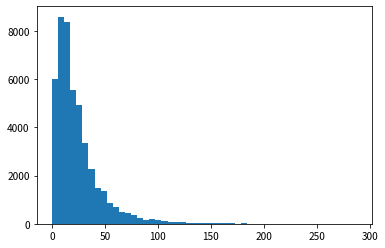

In [54]:
# count: Â∞çÊØèÂÄãÂïÜÂìÅÔºåË®àÁÆó title Êñ∑Ë©ûÊï∏Èáè„ÄÅdesc Êñ∑Ë©ûÊï∏Èáè
def count_terms(term_string):
    if not isinstance(term_string, str):
        return 0
    return len(term_string.split())

term_df['title_term_count'] = term_df['title_cutterms'].apply(count_terms)
term_df['desc_term_count'] = term_df['desc_cutterms'].apply(count_terms)
print("term_df w/ counts", term_df.shape)
display(term_df.head(1))

# Áúã title Êñ∑Ë©ûÊï∏ÈáèÂàÜÂ∏É
print("title_term_count \nrange", term_df['title_term_count'].min(), term_df['title_term_count'].max())
print("mean", term_df['title_term_count'].mean(), "\nmedian", term_df['title_term_count'].median())
plt.hist(term_df['title_term_count'], bins=50)
plt.show()

# Áúã desc Êñ∑Ë©ûÊï∏ÈáèÂàÜÂ∏É
print("desc_term_count \nrange", term_df['desc_term_count'].min(), term_df['desc_term_count'].max())
print("mean", term_df['desc_term_count'].mean(), "\nmedian", term_df['desc_term_count'].median())
plt.hist(term_df['desc_term_count'], bins=50)
plt.show()

zero_title_terms_df (25, 5)
zero_desc_terms_df (2975, 5)
zero_terms_df (5, 5)
zero_terms_df in zero_title_terms_df? True
zero_terms_df in zero_desc_terms_df? True


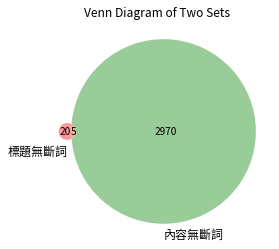

In [60]:
# ÊäìÂá∫Êñ∑Ë©û = 0 ÁöÑÂïÜÂìÅ

# ÁúãÊúâÂ§öÂ∞ëÂïÜÂìÅÁöÑ title Êñ∑Ë©ûÊï∏Èáè = 0
zero_title_terms_df = term_df[term_df['title_term_count'] == 0]
print("zero_title_terms_df", zero_title_terms_df.shape)

# ÁúãÊúâÂ§öÂ∞ëÂïÜÂìÅÁöÑ desc Êñ∑Ë©ûÊï∏Èáè = 0
zero_desc_terms_df = term_df[term_df['desc_term_count'] == 0]
print("zero_desc_terms_df", zero_desc_terms_df.shape)

# ÁúãÊúâÂ§öÂ∞ëÂïÜÂìÅÁöÑ title Êñ∑Ë©ûÊï∏Èáè + desc Êñ∑Ë©ûÊï∏Èáè = 0
zero_terms_df = term_df[(term_df['title_term_count'] == 0) & (term_df['desc_term_count'] == 0)]
print("zero_terms_df", zero_terms_df.shape)
print("zero_terms_df in zero_title_terms_df?", zero_terms_df['SalePageId'].isin(zero_title_terms_df['SalePageId']).all())
print("zero_terms_df in zero_desc_terms_df?", zero_terms_df['SalePageId'].isin(zero_desc_terms_df['SalePageId']).all())

# title, desc Êñ∑Ë©û = 0 ÁöÑÊñáÊ∞èÂúñ
title0_set = set(zero_title_terms_df['SalePageId'])
desc0_set = set(zero_desc_terms_df['SalePageId'])
venn2([title0_set, desc0_set], set_labels=('Ê®ôÈ°åÁÑ°Êñ∑Ë©û', 'ÂÖßÂÆπÁÑ°Êñ∑Ë©û'))
plt.title("Venn Diagram of Two Sets")
plt.show()

In [82]:
# Áúã‰∏Ä‰∏ã title Êñ∑Ë©ûÊï∏Èáè = 0 ÁöÑÂïÜÂìÅ (ÁúãËµ∑‰æÜÊòØË¥àÂìÅ„ÄÅÂè£ÁΩ©)
salePage_df[salePage_df['SalePageId'].isin(zero_title_terms_df['SalePageId'].tolist())].drop(columns=['ShopId'])

# Áúã‰∏Ä‰∏ã desc Êñ∑Ë©ûÊï∏Èáè = 0 ÁöÑÂïÜÂìÅ (Ê®ôÈ°åÈÇÑÊòØÊúâ 'ÈôêÊôÇÁâπË≥£' ‰πãÈ°ûÁöÑÂ≠óÁúº)
#salePage_df[salePage_df['SalePageId'].isin(zero_desc_terms_df['SalePageId'].tolist())].drop(columns=['ShopId']).head(25)

# Áúã‰∏Ä‰∏ã title + desc Êñ∑Ë©ûÊï∏Èáè = 0 ÁöÑÂïÜÂìÅ
#salePage_df[salePage_df['SalePageId'].isin(zero_terms_df['SalePageId'].tolist())].drop(columns=['ShopId']).head(25)

SalePageId  SalePageTitle  \
10185     7148433     0624490856   
10223     7181114     0723189954   
10986     7917392              0   
18352     7028992         000000   
21791     7146029     0624512268   
21838     7311609       09240001   
21851     7177330     0723854943   
21859     7177334     0723691683   
21860     7177341     0723158905   
23159     7909583              0   
33260     7162156     0623884646   
33270     7181101     0723752566   
33271     7177329     0724719767   
33272     7176247       07250001   
33278     7163326     0624731189   
33283     7188533     0723731509   
33284     7208673       08080001   
33976     9715016  2100011679962   
35947     7217391      081201118   
37297     7229413      081801240   
44835     7252697       08260001   
44840     7177335     0723014554   
44841     7177345     0723601373   
44843     7218439       08120001   
45831     8139740  2100011138179   

                             SaleProductDescShortContent  
10185                                                NaN  
10223      Ë°®Â±§ÂÖ∑ÊΩëÊ∞¥ÊïàÊûú\n‰∏≠ÈñìÂ±§ÈùúÈõªÂê∏ÈôÑÈÅéÊøæÂ±§\nË£°Â±§ËàíÈÅ©Ë§áÂêàÊùêË≥™\nÁ¨¶ÂêàCNS14774ÈÜ´Áî®Âè£ÁΩ©  
10986                                Ë¥àÂìÅ-I'M MEMEÊàëÊÑõÂøÉÊ©üÊöàÊüìÂîáÂà∑  
18352                                                NaN  
21791                                                NaN  
21838      Ë°®Â±§ÂÖ∑ÊΩëÊ∞¥ÊïàÊûú\n‰∏≠ÈñìÂ±§ÈùúÈõªÂê∏ÈôÑÈÅéÊøæÂ±§\nË£°Â±§ËàíÈÅ©Ë§áÂêàÊùêË≥™\nÁ¨¶ÂêàCNS14774ÈÜ´Áî®Âè£ÁΩ©  
21851      Ë°®Â±§ÂÖ∑ÊΩëÊ∞¥ÊïàÊûú\n‰∏≠ÈñìÂ±§ÈùúÈõªÂê∏ÈôÑÈÅéÊøæÂ±§\nË£°Â±§ËàíÈÅ©Ë§áÂêàÊùêË≥™\nÁ¨¶ÂêàCNS14774ÈÜ´Áî®Âè£ÁΩ©  
21859      Ë°®Â±§ÂÖ∑ÊΩëÊ∞¥ÊïàÊûú\n‰∏≠ÈñìÂ±§ÈùúÈõªÂê∏ÈôÑÈÅéÊøæÂ±§\nË£°Â±§ËàíÈÅ©Ë§áÂêàÊùêË≥™\nÁ¨¶ÂêàCNS14774ÈÜ´Áî®Âè£ÁΩ©  
21860      Ë°®Â±§ÂÖ∑ÊΩëÊ∞¥ÊïàÊûú\n‰∏≠ÈñìÂ±§ÈùúÈõªÂê∏ÈôÑÈÅéÊøæÂ±§\nË£°Â±§ËàíÈÅ©Ë§áÂêàÊùêË≥™\nÁ¨¶ÂêàCNS14774ÈÜ´Áî®Âè£ÁΩ©  
23159                                Ë¥àÂìÅ-I'M MEMEÊàëÊÑõÂøÉÊ©üÊöàÊüìÂîáÂà∑  
33260  ÈöîÈõ¢Á≤âÂ°µ„ÄÅÁ¥∞Ëèå„ÄÅÈò≤Ê≠¢È£õÊ≤´ÂÇ≥Êüì\nË°®Â±§ÂÖ∑ÊΩëÊ∞¥ÊïàÊûú\n‰∏≠ÈñìÂ±§ÈùúÈõªÂê∏ÈôÑÈÅéÊøæÂ±§\nË£°Â±§ËàíÈÅ©Ë§áÂêàÊùêË≥™\...  
33270      Ë°®Â±§ÂÖ∑ÊΩëÊ∞¥ÊïàÊûú\n‰∏≠ÈñìÂ±§ÈùúÈõªÂê∏ÈôÑÈÅéÊøæÂ±§\nË£°Â±§ËàíÈÅ©Ë§áÂêàÊùêË≥™\nÁ¨¶ÂêàCNS14774ÈÜ´Áî®Âè£ÁΩ©  
33271      Ë°®Â±§ÂÖ∑ÊΩëÊ∞¥ÊïàÊûú\n‰∏≠ÈñìÂ±§ÈùúÈõªÂê∏ÈôÑÈÅéÊøæÂ±§\nË£°Â±§ËàíÈÅ©Ë§áÂêàÊùêË≥™\nÁ¨¶ÂêàCNS14774ÈÜ´Áî®Âè£ÁΩ©  
33272      Ë°®Â±§ÂÖ∑ÊΩëÊ∞¥ÊïàÊûú\n‰∏≠ÈñìÂ±§ÈùúÈõªÂê∏ÈôÑÈÅéÊøæÂ±§\nË£°Â±§ËàíÈÅ©Ë§áÂêàÊùêË≥™\nÁ¨¶ÂêàCNS14774ÈÜ´Áî®Âè£ÁΩ©  
33278      Ë°®Â±§ÂÖ∑ÊΩëÊ∞¥ÊïàÊûú\n‰∏≠ÈñìÂ±§ÈùúÈõªÂê∏ÈôÑÈÅéÊøæÂ±§\nË£°Â±§ËàíÈÅ©Ë§áÂêàÊùêË≥™\nÁ¨¶ÂêàCNS14774ÈÜ´Áî®Âè£ÁΩ©  
33283      Ë°®Â±§ÂÖ∑ÊΩëÊ∞¥ÊïàÊûú\n‰∏≠ÈñìÂ±§ÈùúÈõªÂê∏ÈôÑÈÅéÊøæÂ±§\nË£°Â±§ËàíÈÅ©Ë§áÂêàÊùêË≥™\nÁ¨¶ÂêàCNS14774ÈÜ´Áî®Âè£ÁΩ©  
33284      Ë°®Â±§ÂÖ∑ÊΩëÊ∞¥ÊïàÊûú\n‰∏≠ÈñìÂ±§ÈùúÈõªÂê∏ÈôÑÈÅéÊøæÂ±§\nË£°Â±§ËàíÈÅ©Ë§áÂêàÊùêË≥™\nÁ¨¶ÂêàCNS14774ÈÜ´Áî®Âè£ÁΩ©  
33976                                     Ë¥àÂìÅ-Ëñá‰Ω≥ÊäóÁóòÊΩîÈù¢‰π≥30ml  
35947                                                NaN  
37297                                                NaN  
44835      Ë°®Â±§ÂÖ∑ÊΩëÊ∞¥ÊïàÊûú\n‰∏≠ÈñìÂ±§ÈùúÈõªÂê∏ÈôÑÈÅéÊøæÂ±§\nË£°Â±§ËàíÈÅ©Ë§áÂêàÊùêË≥™\nÁ¨¶ÂêàCNS14774ÈÜ´Áî®Âè£ÁΩ©  
44840      Ë°®Â±§ÂÖ∑ÊΩëÊ∞¥ÊïàÊûú\n‰∏≠ÈñìÂ±§ÈùúÈõªÂê∏ÈôÑÈÅéÊøæÂ±§\nË£°Â±§ËàíÈÅ©Ë§áÂêàÊùêË≥™\nÁ¨¶ÂêàCNS14774ÈÜ´Áî®Âè£ÁΩ©  
44841      Ë°®Â±§ÂÖ∑ÊΩëÊ∞¥ÊïàÊûú\n‰∏≠ÈñìÂ±§ÈùúÈõªÂê∏ÈôÑÈÅéÊøæÂ±§\nË£°Â±§ËàíÈÅ©Ë§áÂêàÊùêË≥™\nÁ¨¶ÂêàCNS14774ÈÜ´Áî®Âè£ÁΩ©  
44843      Ë°®Â±§ÂÖ∑ÊΩëÊ∞¥ÊïàÊûú\n‰∏≠ÈñìÂ±§ÈùúÈõªÂê∏ÈôÑÈÅéÊøæÂ±§\nË£°Â±§ËàíÈÅ©Ë§áÂêàÊùêË≥™\nÁ¨¶ÂêàCNS14774ÈÜ´Áî®Âè£ÁΩ©  
45831                               „ÄêÂª†ÂïÜÁõ¥ÈÄÅ„ÄëË¥àÂìÅ-VatiÊ∏ÖÊΩîÂô¥ÈúßËºïÂ∑ßÁì∂

#### 3-2. Â≠óÂÖ∏ÊúâÂ§öÂ∞ëÂ≠ó
- ‰∏ÄÂÄãÂ≠óÁöÑÔºöÂèØÊòØÊúâ 'Ë¥à'ÔºåÂ•ΩÂÉè‰πü‰∏çËÉΩÂà™
- Ëã±ÊñáÂñÆÂ≠óÔºöÊúâÂìÅÁâå
- Êï∏Â≠óÔºöÁúãËµ∑‰æÜÂèØ‰ª•Âà™Êéâ
- ÁâπÊÆäÁ¨¶ËôüÔºöÂæàÊÉ≥Âà™ÊéâÔºå‰ΩÜËê¨‰∏Ä 'üî•' ÊòØÊúâÊÑèÁæ©ÁöÑÂë¢Ôºü

In [ ]:
# Êñ∑Ë©ûÂ≠óÂÖ∏
def look_vocab(term_ls):
    # counter Êñ∑Ë©ûÂ≠óÂÖ∏, Ë©ûÈ†ª
    term_freq = Counter(term_ls)
    print(f"\nvocab ‰∏çÈáçË§áÁöÑË©û ({len(term_freq)}): {term_freq.most_common(20)}")
    
    # ‰∏ÄÂÄãÂ≠óÁöÑË©û, Ëã±ÊñáÂñÆÂ≠ó, Êï∏Â≠ó, ÁâπÊÆäÁ¨¶Ëôü
    one_char_terms = [term for term in term_freq if len(term) == 1]
    print(f"‰∏ÄÂÄãÂ≠óÁöÑË©û ({len(one_char_terms)}): {one_char_terms}")
    english_terms = [term for term in term_freq if re.match(r'^[a-zA-Z]+$', term)]
    print(f"Ëã±ÊñáÂñÆÂ≠ó ({len(english_terms)}): {english_terms}")
    number_terms = [term for term in term_freq if re.match(r'^\d+(\.\d+)?$', term)]
    print(f"Êï∏Â≠ó ({len(number_terms)}): {number_terms}")
    special_terms = [term for term in term_freq if re.match(r'^[^\w\s]+$', term)]
    print(f"ÁâπÊÆäÁ¨¶Ëôü ({len(special_terms)}): {special_terms}")
    # ÂÅúÁî®Ë©û
    #stop_words = set(['ÁöÑ', 'ÊòØ', 'Âú®', '‰∫Ü', 'Êúâ', 'Âíå', 'Â∞±', '‰∏ç', '‰∫∫', 'Êàë', '‰ªñ', 'ÈÄô', '‰πü', 'Âæà', 'ÈÉΩ', 'Ë¶Å', 'Ë™™', 'Âéª'])
    return term_freq

In [ ]:
# ÂïÜÂìÅÊ®ôÈ°åÂ≠óÂÖ∏
title_term_ls = ' '.join(term_df['title_cutterms'].fillna('')).split()
print(f"title_terms ({len(title_term_ls)})")
title_vocab = look_vocab(title_term_ls)

title_terms (365404)

vocab ‰∏çÈáçË§áÁöÑË©û (30624): [('ml', 8843), ('Áõ¥ÈÄÅ', 7803), ('Âª†ÂïÜ', 7801), ('g', 7022), ('‰ªªÈÅ∏', 6890), ('ÂÖ•', 6521), ('Â§ö', 4945), ('Ê¨æ', 3989), ('Ëâ≤', 2811), ('Ë¥àÂìÅ', 2139), ('cm', 1849), ('ÂæÖ', 1507), ('Âà™Èô§', 1440), ('Èö®Ê©ü', 1352), ('+', 1340), ('‰øùÊøï', 1311), ('Âá∫Ë≤®', 1309), ('Áâá', 1295), ('ÂÖ©', 1280), ('Â∞è', 1175)]
‰∏ÄÂÄãÂ≠óÁöÑË©û (1600): ['Èªë', 'g', 'ÂÖ•', 'Â§ö', 'Ê¨æ', 'Â†Ö', 'ÂìÅ', 'Áõí', '‰∏≠', 'Âç≥', 'Ê∫∂', 'ÁÑ°', 'Âä†', 'Á≥ñ', 'ÂèØ', 'Á≤â', 'ÂåÖ', '‰π≥', 'Êãø', 'Èêµ', 'È´ò', 'ÈÖµ', 'Ëºï', 'Â≠Ö', 'Â§ß', 'Áâπ', 'Ë≥£', 'Êñ∞', 'Ëàä', 'Âéö', 'ÂæÖ', 'Á∫ñ', 'È¶ô', 'ÁÆ±', 'Ë≥º', 'Â•Ω', 'Âñù', 'Á∂†', 'Âæó', 'Áæé', 'ÈÜá', 'Á®Æ', 'È£≤', 'Ë¶Ü', 'Ë£ù', '‰∏Ä', 'ÁôΩ', 'Âíå', 'Ááí', 'n', 'Êâã', 'x', 'Ê≠ê', 'Ë´ã', '‰ª∂', 'Èúñ', 'Êà∂', 'Âú∞', 'Á±Ω', 'Á≥ä', 'ÈÉΩ', '‰æÜ', 'Êó∫', 'Ëå∂', 'Â∞è', 'ÊúÄ', 'ÁöÑ', '‰∫ã', '‰∏â', 'ÁµÑ', '+', 'Âêã', 'Ë¥à', 'Â•≥', 'Áî∑', 'Âèç', 'Âç°', 'ÂÖ∂', 'Á¥Ö', 'Ëâ≤', 'Êë∫', 'Á´•', 'Âø´', 'm', 'l', 'Ëá≠', 'Ê£â', 'ÂÄç',

In [ ]:
# ÂïÜÂìÅÊïòËø∞Â≠óÂÖ∏
desc_term_ls = ' '.join(term_df['desc_cutterms'].fillna('')).split()
print(f"desc_terms ({len(desc_term_ls)})")
desc_vocab = look_vocab(desc_term_ls)

desc_terms (1100644)

vocab ‰∏çÈáçË§áÁöÑË©û (45377): [('ÁöÑ', 26824), ('‰∏ç', 12408), ('ËÇåËÜö', 10036), ('ÂèØ', 9306), ('Ë®≠Ë®à', 7805), ('‰ΩøÁî®', 5899), ('‰∏Ä', 5848), ('Ê∑ªÂä†', 5379), ('Â•Ω', 5329), ('Ëàá', 4676), ('ËàíÈÅ©', 4613), ('ÁÑ°', 4525), ('Âèä', 4348), ('Êõ¥', 4230), ('‰øùÊøï', 4001), ('ËÉΩ', 3789), ('ÊàêÂàÜ', 3783), ('ËÆì', 3570), ('Á®Æ', 3465), ('ÈÖçÊñπ', 3181)]
‰∏ÄÂÄãÂ≠óÁöÑË©û (2421): ['ÁöÑ', 'Áôæ', 'Âπ¥', 'Âèä', 'Ëàá', 'Âæå', 'Êàñ', 'Áù°', 'Ââç', '‰ª§', '‰∫∫', '‰ª•', 'ÂÖÖ', 'Ê∞Æ', 'e', 'ÊòØ', 'Â•Ω', 'ËÄÅ', 'ÁÑ°', '+', 'Â∞±', 'ËÉΩ', 'Ëûç', 'Êñº', 'Â∞á', 'ËÆì', 'ÂÜ∑', 'ÁöÜ', 'ÂèØ', 'c', 'Âè¶', 'Áï∂', 'Ë•ø', 'Èªû', 'Á¥î', 'Êúâ', 'Âíå', 'Âçª', 'Âèà', 'ÈÄÅ', 'Á¶Æ', 'ÈÉΩ', 'Âç≥', 'Ê≤ñ', 'È£≤', '~', 'Êñ∞', 'ÂÖ®', 'Ê∑∑', 'Ë±Ü', '‚ÑÉ', 'Âê´', 'Ê≤π', '‰∏ç', 'Á≥ñ', 'ÂÉÖ', '‰∏â', 'Á®Æ', 'Èªë', 'Áî¢', 'ÈπΩ', 'Èà£', 'Èêµ', '‰ª£', 'Âæû', '‰∏≠', 'Âú®', '‰πü', 'ÁÜ±', 'Âà∞', 'Â§ß', 'Á∂≠', 'Êäó', 'Èèà', 'ÊúÄ', 'Á≠â', 'ÈÖ∏', 'Áîú', 'ÁàΩ', 'Âè£', 'Èöª', 'Â§ö', '‰πæ', 'Âñî', 'Áï•', 'Â∏∂', 

In [151]:
# ÂïÜÂìÅÊ®ôÈ°å+ÊïòËø∞Â≠óÂÖ∏
all_term_ls = ' '.join(term_df['title_cutterms'].fillna('') + ' ' + term_df['desc_cutterms'].fillna('')).split()
print(f"all_terms ({len(all_term_ls)})")
all_vocab = look_vocab(all_term_ls)

all_terms (1466048)

vocab ‰∏çÈáçË§áÁöÑË©û (63030): [('ÁöÑ', 27380), ('‰∏ç', 12792), ('ËÇåËÜö', 10047), ('ml', 9893), ('ÂèØ', 9856), ('Áõ¥ÈÄÅ', 8207), ('Âª†ÂïÜ', 8203), ('Ë®≠Ë®à', 7860), ('g', 7826), ('Â§ö', 7532), ('ÂÖ•', 6999), ('‰ªªÈÅ∏', 6906), ('‰∏Ä', 6495), ('‰ΩøÁî®', 5909), ('Â•Ω', 5561), ('Ê∑ªÂä†', 5432), ('‰øùÊøï', 5312), ('Ê¨æ', 4944), ('ÁÑ°', 4905), ('Ëàá', 4813)]
‰∏ÄÂÄãÂ≠óÁöÑË©û (2647): ['Èªë', 'g', 'ÂÖ•', 'Â§ö', 'Ê¨æ', 'ÁöÑ', 'Áôæ', 'Âπ¥', 'Âèä', 'Ëàá', 'Âæå', 'Êàñ', 'Áù°', 'Ââç', '‰ª§', '‰∫∫', 'Â†Ö', '‰ª•', 'ÂÖÖ', 'Ê∞Æ', 'e', 'ÊòØ', 'Â•Ω', 'ÂìÅ', 'ËÄÅ', 'ÁÑ°', '+', 'Â∞±', 'ËÉΩ', 'Ëûç', 'Êñº', 'Â∞á', 'ËÆì', 'ÂÜ∑', 'ÁöÜ', 'ÂèØ', 'c', 'Âè¶', 'Áï∂', 'Ë•ø', 'Èªû', 'Áõí', 'Á¥î', 'Êúâ', 'Âíå', 'Âçª', 'Âèà', 'ÈÄÅ', 'Á¶Æ', 'ÈÉΩ', 'Âç≥', 'Ê≤ñ', 'È£≤', '~', 'Êñ∞', 'ÂÖ®', 'Ê∑∑', 'Ë±Ü', '‰∏≠', '‚ÑÉ', 'Ê∫∂', 'Âê´', 'Ê≤π', 'Âä†', 'Á≥ñ', '‰∏ç', 'ÂÉÖ', '‰∏â', 'Á®Æ', 'Áî¢', 'ÈπΩ', 'Èà£', 'Èêµ', '‰ª£', 'Âæû', 'Âú®', '‰πü', 'ÁÜ±', 'Á≤â', 'ÂåÖ', 'Âà∞', 'Â§ß', '‰π≥', 'Êãø', 'È´ò', 'ÈÖµ', 'Ëºï',

#### 3-3. ÂÑ≤Â≠òÂ≠óÂÖ∏
- Â∞á all_vocab ËΩâÊàê dataframe
- ‰∏¶Âä†‰∏Ä‰∫õ columnsÔºàË©ûÈ†ª„ÄÅË©ûÁöÑ‰æÜÊ∫ê„ÄÅ‰∏ÄÂÄãÂ≠ó„ÄÅËã±ÊñáÂñÆÂ≠ó„ÄÅÊï∏Â≠ó„ÄÅÁâπÊÆäÁ¨¶Ëôü„ÄÅUnicode Ê®ôÈªûÁ¨¶ËôüÔºâ
- output `SalePage_vocab.csv`

In [ ]:
# Â∞áÂ≠óÂÖ∏ËΩâÊàê DataFrame
# all_vocab --> all_vocab_df
all_vocab_df = pd.DataFrame(all_vocab.items(), columns=['term', 'freq'])
all_vocab_df = all_vocab_df.sort_values(by='freq', ascending=False).reset_index(drop=True)

# Âä†‰∏Ä‰∫õ columns: source, length, is_onechar, is_english, is_number, is_special, is_punctuation
all_vocab_df['source'] = all_vocab_df['term'].apply(
    lambda x: 'both' if x in title_vocab and x in desc_vocab else 
              'title' if x in title_vocab else 
              'desc' if x in desc_vocab else 
              'none'
)
all_vocab_df['length'] = all_vocab_df['term'].apply(len)
all_vocab_df['is_onechar'] = all_vocab_df['term'].apply(lambda x: len(x) == 1)
all_vocab_df['is_english'] = all_vocab_df['term'].apply(lambda x: bool(re.match(r'^[a-zA-Z]+$', x)))
all_vocab_df['is_number'] = all_vocab_df['term'].apply(lambda x: bool(re.match(r'^\d+(\.\d+)?$', x)))
all_vocab_df['is_special'] = all_vocab_df['term'].apply(lambda x: bool(re.match(r'^[^\w\s]+$', x)))
all_vocab_df['is_punctuation'] = all_vocab_df['term'].apply(lambda x: all(unicodedata.category(c).startswith('P') for c in x))

print(f"all_vocab_df shape: {all_vocab_df.shape}")
display(all_vocab_df.head(1))

all_vocab_df shape: (63030, 9)


term   freq source  length  is_onechar  is_english  is_number  is_special  \
0    ÁöÑ  27380   both       1        True       False      False       False   

   is_punctuation  
0           False

source
both    45377
desc    17653
Name: count, dtype: int64

length range 1 59
Axes(0.125,0.125;0.775x0.755)


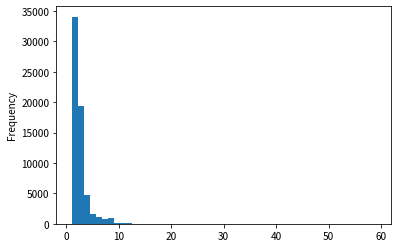

is_onechar: 2647
is_english: 4121
is_number: 33
is_special: 184
is_punctuation: 15


In [ ]:
# ÈáùÂ∞çÂ≠óÂÖ∏ all_vocab_df ÂÅö‰∏Ä‰∫õÁµ±Ë®à
print(all_vocab_df['source'].value_counts())
print("\nlength range", all_vocab_df['length'].min(), all_vocab_df['length'].max())
print(all_vocab_df['length'].plot.hist(bins=50))
plt.show()
print(f"is_onechar: {(all_vocab_df['is_onechar'] == 1).sum()}")
print(f"is_english: {(all_vocab_df['is_english'] == 1).sum()}")
print(f"is_number: {(all_vocab_df['is_number'] == 1).sum()}")
print(f"is_special: {(all_vocab_df['is_special'] == 1).sum()}")
print(f"is_punctuation: {(all_vocab_df['is_punctuation'] == 1).sum()}")

In [194]:
all_vocab_df[all_vocab_df['length'] > 15]

term  freq source  length  \
13499                             samsungs6/s7/s8/s9/s10     8   both      22   
15721                                   max/xr/x/8/8plus     6   both      16   
19097                                jeanmariesantantoni     5   both      19   
21006                                iphone/ipad/android     4   both      19   
24066                                  hydroxyundecanoic     3   both      17   
29108                                   methoxycinnamate     2   both      16   
29356                                   avier-colormixpd     2   desc      16   
30795                                 non-comedogenicity     2   both      18   
32273                                 panasonicxultraman     2   both      18   
36657                               d-upwondereyelidtape     2   desc      20   
37810                                windows/mac/android     1   both      19   
37923                                   usb3.2-typec-h20     1   desc      16   
38613                               poyaÂ∑¥Ë•øvelosoËéäÂúíÁ¥ÖÂç°ËâæÊùúÈªÉËúú     1   both      20   
40479                                  tetraisopalmitate     1   both      17   
40542                                   phytosphingosine     1   both      16   
42104                                   slimn17-k68008ww     1   desc      16   
42377                                   typec+usb3.2-t46     1   desc      16   
42412                                  usb3.2-typec-rh11     1   desc      17   
43765                                  kensington-orbit¬Æ     1   desc      17   
44312                                surfacepro-k97950ww     1   desc      19   
44336                                  usb3.2-typec-rh10     1   desc      17   
44533                                  sls/sles/als/ales     1   both      17   
45276                                pd-10000mah-dlp1815     1   desc      19   
47865                                md003-1-ipadair4-bk     1   desc      19   
47882  26650,22650,21700,20700,18650,18490,18350,1767...     1   both      59   
47942                              avier-onestepusb-atol     1   desc      21   
47944                              avier-onestepusb-ctol     1   desc      21   
47965                                avier-colormixtypec     1   desc      19   
47967                               avier-colormixiphone     1   desc      20   
49973                                 moschinotoyboy30ml     1   desc      18   
50856                                  theladyworexartis     1   desc      17   
51643                              usb3.2totypec-2ÂÖ•-xa26     1   desc      21   
52054                                skinarma-airpodspro     1   desc      19   
53880                                   type-c+lightning     1   both      16   
54076                              avier-onestepusb-ctoc     1   desc      21   
54588                                  18650,18490,18350     1   both      17   
54598                                  17670,17500,16340     1   both      17   
54632                                  avier-colormix42w     1   desc      17   
56753                                 samsungs6/s7/s8/s9     1   both      18   
61316                         micro-usb/type-c/lightning     1   both      26   

       is_onechar  is_english  is_number  is_special  is_punctuation  
13499       False       False      False       False           False  
15721       False       False      False       False           False  
19097       False        True      False       False           False  
21006       False       False      False       False           False  
24066       False        True      False       False           False  
29108       False        True      False       False           False  
29356       False       False      False       False           False  
30795       False       False      False       False           False  
32273       False        True      False       False           False

In [192]:
all_vocab_df[all_vocab_df['is_onechar'] == 1]

term   freq source  length  is_onechar  is_english  is_number  \
0        ÁöÑ  27380   both       1        True       False      False   
1        ‰∏ç  12792   both       1        True       False      False   
4        ÂèØ   9856   both       1        True       False      False   
8        g   7826   both       1        True        True      False   
9        Â§ö   7532   both       1        True       False      False   
...    ...    ...    ...     ...         ...         ...        ...   
62906    üåø      1   both       1        True       False      False   
62907    üåé      1   both       1        True       False      False   
62908    ‚ùó      1   both       1        True       False      False   
62943    ‚ï≥      1   both       1        True       False      False   
62962    ‰ø¢      1   both       1        True       False      False   

       is_special  is_punctuation  
0           False           False  
1           False           False  
4           False           False  
8           False           False  
9           False           False  
...           ...             ...  
62906        True           False  
62907        True           False  
62908        True           False  
62943        True           False  
62962       False           False  

[2647 rows x 9 columns]

In [195]:
all_vocab_df[all_vocab_df['is_english'] == 1]

term  freq source  length  is_onechar  is_english  is_number  \
3              ml  9893   both       2       False        True      False   
8               g  7826   both       1        True        True      False   
29             cm  3373   both       2       False        True      False   
93              x  1650   both       1        True        True      False   
136             b  1338   both       1        True        True      False   
...           ...   ...    ...     ...         ...         ...        ...   
62882    vavacoco     1   desc       8       False        True      False   
62909         frl     1   desc       3       False        True      False   
62941    babybear     1   desc       8       False        True      False   
62956      creamy     1   desc       6       False        True      False   
62985  cottonplus     1   desc      10       False        True      False   

       is_special  is_punctuation  
3           False           False  
8           False           False  
29          False           False  
93          False           False  
136         False           False  
...           ...             ...  
62882       False           False  
62909       False           False  
62941       False           False  
62956       False           False  
62985       False           False  

[4121 rows x 9 columns]

In [196]:
all_vocab_df[all_vocab_df['is_number'] == 1]

term  freq source  length  is_onechar  is_english  is_number  \
4076           2    47   both       1        True       False       True   
5696           3    29   both       1        True       False       True   
12762         13     9   both       2       False       False       True   
13436          1     8   both       1        True       False       True   
15669          8     6   both       1        True       False       True   
15944       1945     6   both       4       False       False       True   
16048         12     6   both       2       False       False       True   
16405         04     6   both       2       False       False       True   
19885  212852675     4   both       9       False       False       True   
22509        3.1     4   both       3       False       False       True   
22851       2022     4   both       4       False       False       True   
23591          4     3   both       1        True       False       True   
24999          5     3   both       1        True       False       True   
25588        2.0     3   both       3       False       False       True   
25767        3.0     3   both       3       False       False       True   
26644         53     3   desc       2       False       False       True   
29531      22716     2   both       5       False       False       True   
30186          0     2   both       1        True       False       True   
34993          Ôºî     2   both       1        True       False       True   
36950        800     2   both       3       False       False       True   
38311       1200     1   both       4       False       False       True   
40246        2.4     1   desc       3       False       False       True   
41222      22000     1   both       5       False       False       True   
41535       2023     1   desc       4       False       False       True   
42963         06     1   both       2       False       False       True   
43210         05     1   both       2       False       False       True   
43244         03     1   both       2       False       False       True   
43247         02     1   both       2       False       False       True   
44900          6     1   desc       1        True       False       True   
51703          Ôºí     1   both       1        True       False       True   
56754         11     1   both       2       False       False       True   
58489        005     1   both       3       False       False       True   
58491        004     1   both       3       False       False       True   

       is_special  is_punctuation  
4076        False           False  
5696        False           False  
12762       False           False  
13436       False           False  
15669       False           False  
15944       False           False  
16048       False           False  
16405       False           False  
19885       False           False  
22509       False           False  
22851       False           False  
23591       False           False  
24999       False           False  
25588       False           False  
25767       False           False  
26644       False           False  
29531       False           False  
30186       False           False  
34993       False           False  
36950       False           False  
38311       False           False  
40246       False           False  
41222       False           False  
41535       False           False  
42963       False           False  
43210       False           False  
43244       False           False  
43247       False           False  
44900       False           False  
51703       False           False  
56754       False           False  
58489       False           False  
58491       False           False

In [197]:
all_vocab_df[all_vocab_df['is_special'] == 1]

term  freq source  length  is_onechar  is_english  is_number  \
27       +  3558   both       1        True       False      False   
85       $  1736   both       1        True       False      False   
100      ~  1577   both       1        True       False      False   
235      ‚óè   876   both       1        True       False      False   
410      ‚òÖ   563   both       1        True       False      False   
...    ...   ...    ...     ...         ...         ...        ...   
62842    ü•á     1   both       1        True       False      False   
62906    üåø     1   both       1        True       False      False   
62907    üåé     1   both       1        True       False      False   
62908    ‚ùó     1   both       1        True       False      False   
62943    ‚ï≥     1   both       1        True       False      False   

       is_special  is_punctuation  
27           True           False  
85           True           False  
100          True           False  
235          True           False  
410          True           False  
...           ...             ...  
62842        True           False  
62906        True           False  
62907        True           False  
62908        True           False  
62943        True           False  

[184 rows x 9 columns]

In [198]:
all_vocab_df[all_vocab_df['is_punctuation'] == 1]

term  freq source  length  is_onechar  is_english  is_number  \
2031     /   114   both       1        True       False      False   
3328     &    61   both       1        True       False      False   
5595     -    30   both       1        True       False      False   
6995     ¬∑    22   both       1        True       False      False   
14653    Ôºé     7   both       1        True       False      False   
18626    ÔºΩ     5   both       1        True       False      False   
18838    ‚Ä¢     5   both       1        True       False      False   
24012   --     3   both       2       False       False      False   
25604    ‚Äß     3   both       1        True       False      False   
26642    .     3   both       1        True       False      False   
29820    _     2   both       1        True       False      False   
31000    #     2   both       1        True       False      False   
31912    Ôπ°     2   both       1        True       False      False   
41166    *     1   both       1        True       False      False   
45063    ¬ª     1   both       1        True       False      False   

       is_special  is_punctuation  
2031         True            True  
3328         True            True  
5595         True            True  
6995         True            True  
14653        True            True  
18626        True            True  
18838        True            True  
24012        True            True  
25604        True            True  
26642        True            True  
29820       False            True  
31000        True            True  
31912        True            True  
41166        True            True  
45063        True            True

In [187]:
# ÂÑ≤Â≠òÂ≠óÂÖ∏ save all_vocab_df
all_vocab_df.to_csv(f'{DATA_DIR}/SalePage_vocab.csv', index=False)

### end

In [199]:
ptr = None
gc.collect()

39097